#### From source:

##### Folder structure
There are 15 different kind of fruits consisting of 44406 images. For 15 different categories
there are 15 folders in our dataset and their sub-categories of fruits were kept in sub-folders like
for apple there is one folder and inside the main folder there are six sub-folders for subcategories.
Sub-categories of all fruits are exit in their relevant sub-folders

##### Data collection
The database used in this study is comprising of 44406 fruit images, which we collected
in a period of 6 months. The images where made with in our lab’s environment under different
scenarios which we mention below. We captured all the images on a clear background with
resolution of 320×258 pixels. We used HD Logitech web camera to took the pictures. During
collecting this database, we created all kind of challenges, which, we have to face in real-world
recognition scenarios in supermarket and fruit shops such as light, shadow, sunshine, pose
variation, to make our model robust for, it might be necessary to cope with illumination
variation, camera capturing artifacts, specular reflection shading and shadows. We tested our
model’s robustness in all scenarios and it perform quit well.
All of images were stored in RGB color-space at 8 bits per channel. The images were
gathered at various day times of the day and in different days for the same category. These
features increase the dataset variability and represent more realistic scenario. The Images had
large variation in quality and lighting. Illumination is one of those variations in imagery. In fact,
illumination can make two images of same fruit less similar than two images of different kind
of fruits. We were used our own intelligent weight machine and camera to captured all images.
The fruit dataset was collected under relatively unconstrained conditions. There are also images
with the room light on and room lights off, moved the camera and intelligent weight machine
near to the windows of our lab than open windows, closed windows, open window curtains,
closed curtains. For a real application in a supermarket, it might be necessary to cope with
illumination variation, camera capturing artifacts, specular reflection shading and shadows.
Below are the few conditions which we were considered during collected dataset.

##### Pose Variations with different categories of fruits
- Variability on the number of elements of fruits
- Used HD camera with 5-megapixel snapshots
- Same color but different Category fruits images with illumination variation
- Cropping and partial occlusion
- Different color same category fruit images
- Different lighting conditions (e.g. fluorescent, natural light some of the fruits shops
- and supermarkets are without sunshine so it can easily affect the recognition system
- Six different kind of apple fruit images
- Three categories of mango fruit with specular reflecting shading and shadows
- Three categories of Kiwi fruit images
- Natural and artificial lighting effect on images
- Partial occlusion with hand

Israr Hussain,, Qianhua He, Zhuliang Chen, & Wei Xie. (2018). Fruit Recognition dataset (Version V 1.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1310165

This is a multi-class classification problem, therefore we will be using convolutional neural network. We will be using Keras to preprocess the images and create a network from scratch.  We will also try some pretrained models. Accuracy and cross entropy will be used to evaluate the models.

In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import random
import datetime
import pickle
from tqdm import tqdm

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [4]:
np.random.seed(42)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Dataset split

In [5]:
# dataset_dir = "../Image-Classification/orig_dataset/"
dataset_dir = "/content/drive/MyDrive/colab/orig_dataset"
os.path.exists(dataset_dir)

True

In [6]:
fruit_folders = [
    folder for folder in os.listdir(dataset_dir)
    if os.path.isdir(os.path.join(dataset_dir, folder))
]
fruit_folders

['Banana',
 'StarFruit',
 'Mango',
 'Orange',
 'Peach',
 'Persimmon',
 'DragonFruit',
 'Plum',
 'Pomegranate',
 'Tomatoes',
 'Muskmelon',
 'Guava',
 'Kiwi',
 'Pear',
 'Apple']

Filetypes:

In [9]:
set([
    file.split('.')[-1] for folder in fruit_folders
    for file in os.listdir(os.path.join(dataset_dir, folder))
])

{'jpeg', 'jpg', 'png'}

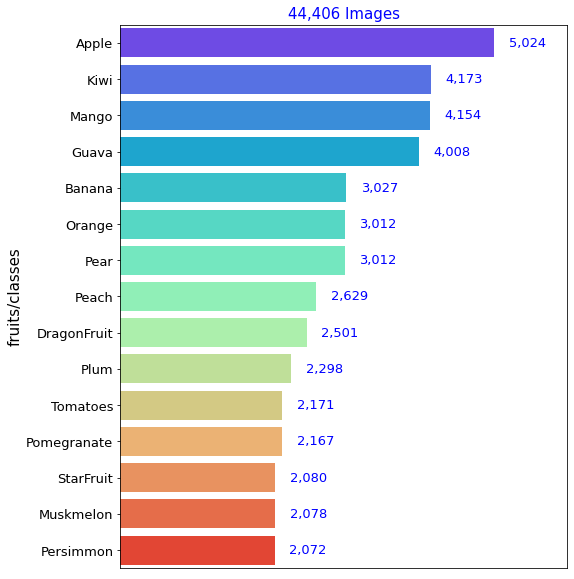

In [9]:
fruit_list = dict(
    zip([folder for folder in fruit_folders], [
        len([
            img for img in os.listdir(os.path.join(dataset_dir, folder))
            if os.path.splitext(dataset_dir + folder +
                                img)[-1] in ['.jpeg', '.jpg', '.png']
        ]) for folder in fruit_folders
    ]))

x = list(
    dict(sorted(fruit_list.items(), key=lambda x: x[1], reverse=True)).keys())
y = list(
    dict(sorted(fruit_list.items(), key=lambda x: x[1],
                reverse=True)).values())
plt.figure(figsize=(8, 10))
sns.barplot(x=y, y=x, palette='rainbow')
plt.ylabel('fruits/classes', fontsize=15)
plt.title('{} Images'.format(f'{sum(y):,}'), fontsize=15, color='blue')
plt.xticks(ticks=[])
plt.xlim(right=6000)
plt.yticks(fontsize=13)
for x_, y_ in enumerate(y):
    plt.text(x=y_ + 200,
             y=x_,
             s=f'{y_:,}',
             fontsize=13,
             color='blue',
             horizontalalignment='left',
             verticalalignment='center')
plt.show()

Class imbalance is clearly present in the dataset.

In [6]:
# new_dataset_dir = "../Image-Classification/dataset/"
new_dataset_dir = "/content/drive/MyDrive/colab/dataset/"

# if os.path.exists(new_dataset_dir):
#     shutil.rmtree(new_dataset_dir)

# if not os.path.exists(new_dataset_dir):
#     os.mkdir(new_dataset_dir)

# for folder in ['train', 'test']:
#     new_dir = os.path.join(new_dataset_dir, folder)
#     os.mkdir(new_dir)

os.listdir(new_dataset_dir)

['train', 'test']

75% of the dataset will be used for training and the rest for testing.

In [6]:
for key, val in fruit_list.items():
    old_dir = os.path.join(dataset_dir, key)
    img_files = [
        img for img in os.listdir(old_dir)
        if any(img.lower().endswith(i) for i in ['.jpeg', '.jpg', '.png'])
    ]

    train_dir = os.path.join(new_dataset_dir, "train", key)
    os.mkdir(train_dir)
    test_dir = os.path.join(new_dataset_dir, "test", key)
    os.mkdir(test_dir)
    # others_dir = os.path.join(new_dataset_dir, "others", key)
    # os.mkdir(others_dir)

    random.shuffle(img_files)

    j, k = 0, 0

    for i in range(len(img_files)):
        if i < round(len(img_files) * .75):
            shutil.copy(os.path.join(old_dir, img_files[i]),
                        os.path.join(train_dir, img_files[i]))
            j += 1
        else:
            shutil.copy(os.path.join(old_dir, img_files[i]),
                        os.path.join(test_dir, img_files[i]))
            k += 1
        # else:
        #     shutil.copy(os.path.join(old_dir, img_files[i]),
        #                 os.path.join(others_dir, img_files[i]))

    # print('{}: {} images to train folder, {} images to test folder'.format(
    #     key.title(), f'{j:,}', f'{k:,}'))

Let's have a look at our train and test folders:

In [7]:
new_dataset_dir = "/content/drive/MyDrive/colab/dataset/"
train_dir = os.path.join(new_dataset_dir, 'train')
test_dir = os.path.join(new_dataset_dir, 'test')
os.path.exists(train_dir), os.path.exists(test_dir)

(True, True)

In [8]:
for subfolder in [train_dir, test_dir]:
    print('{} contains:'.format(subfolder))
    subfolders = dict(
        zip([
            fruit for fruit in os.listdir(subfolder)
            if os.path.isdir(os.path.join(subfolder, fruit))
        ], [
            len([
                img for img in os.listdir(os.path.join(subfolder, fruit)) 
                if any(img.endswith(i) for i in ['jpg', 'jpeg', 'png'])
            ]) for fruit in os.listdir(subfolder)
            if os.path.isdir(os.path.join(subfolder, fruit))
        ]))
    print('{} images'.format(int(sum(list(subfolders.values())))))
    display(subfolders)

/content/drive/MyDrive/colab/dataset/train contains:
33305 images


{'Apple': 3768,
 'Banana': 2270,
 'DragonFruit': 1876,
 'Guava': 3006,
 'Kiwi': 3130,
 'Mango': 3116,
 'Muskmelon': 1558,
 'Orange': 2259,
 'Peach': 1972,
 'Pear': 2259,
 'Persimmon': 1554,
 'Plum': 1724,
 'Pomegranate': 1625,
 'StarFruit': 1560,
 'Tomatoes': 1628}

/content/drive/MyDrive/colab/dataset/test contains:
11101 images


{'Apple': 1256,
 'Banana': 757,
 'DragonFruit': 625,
 'Guava': 1002,
 'Kiwi': 1043,
 'Mango': 1038,
 'Muskmelon': 520,
 'Orange': 753,
 'Peach': 657,
 'Pear': 753,
 'Persimmon': 518,
 'Plum': 574,
 'Pomegranate': 542,
 'StarFruit': 520,
 'Tomatoes': 543}

In [8]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Let's have a look at some samples:

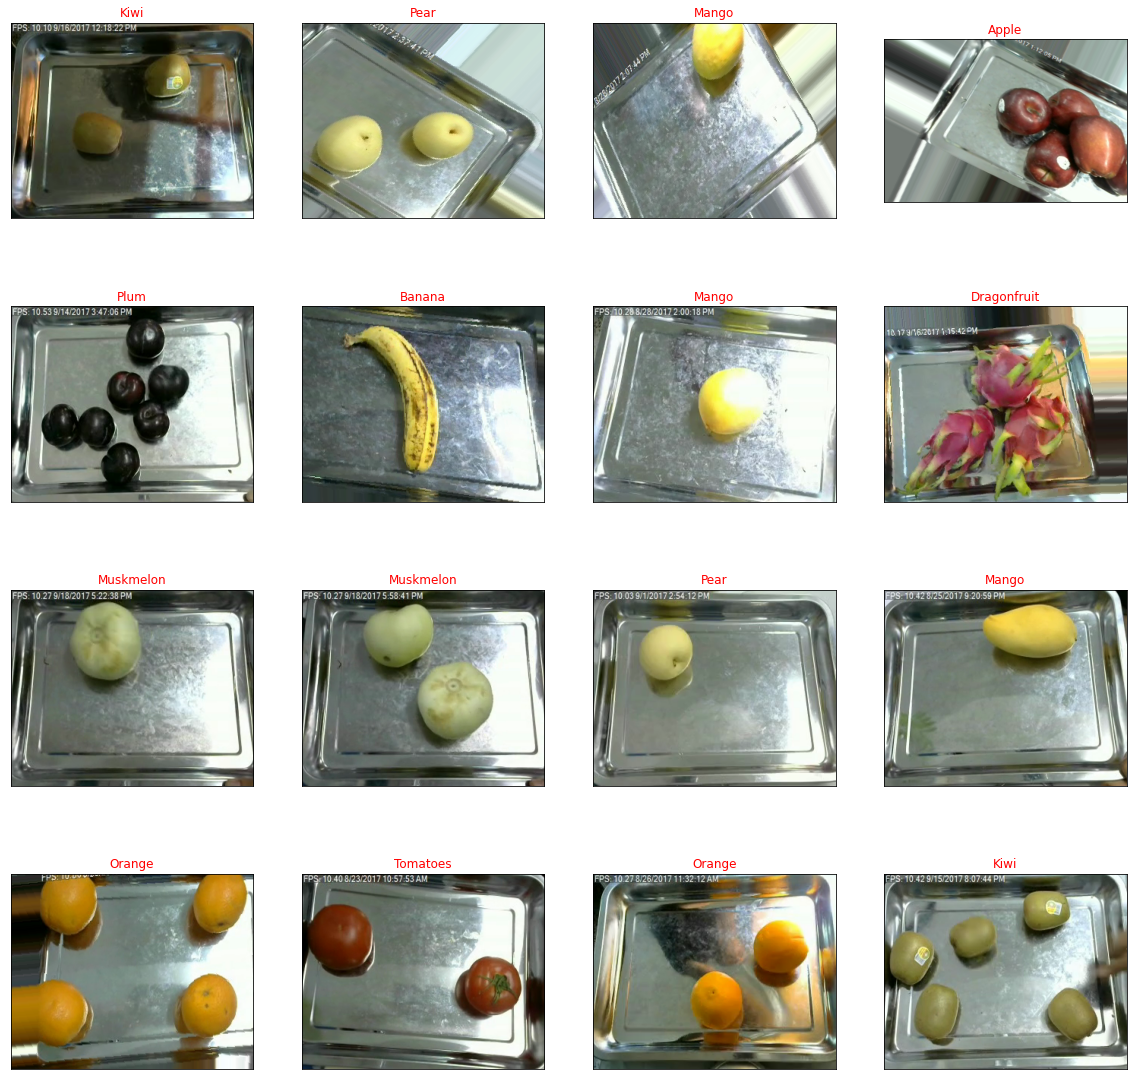

In [13]:
fig = plt.figure(figsize=(20, 5 * 4))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    sample_fruit = random.choice([
        folder for folder in os.listdir(train_dir)
        if os.path.isdir(os.path.join(train_dir, folder))
    ])
    sample_image = os.path.join(
        train_dir, sample_fruit,
        random.choice(os.listdir(os.path.join(train_dir, sample_fruit))))
    img = mpimg.imread(sample_image)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(sample_fruit.title(), color="red")
plt.show()
del img

In [9]:
augmentation = ImageDataGenerator(rescale=1. / 255,
                                  zoom_range=0.3,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  validation_split=0.2,
                                  preprocessing_function=None)

In [10]:
target_size = (200, 200)

In [14]:
img = load_img(sample_image,
               grayscale=False,
               color_mode='rgb',
               target_size=target_size,
               interpolation='nearest')
x = img_to_array(img)
x = x.reshape((1, ) + x.shape)
x.shape

(1, 200, 200, 3)

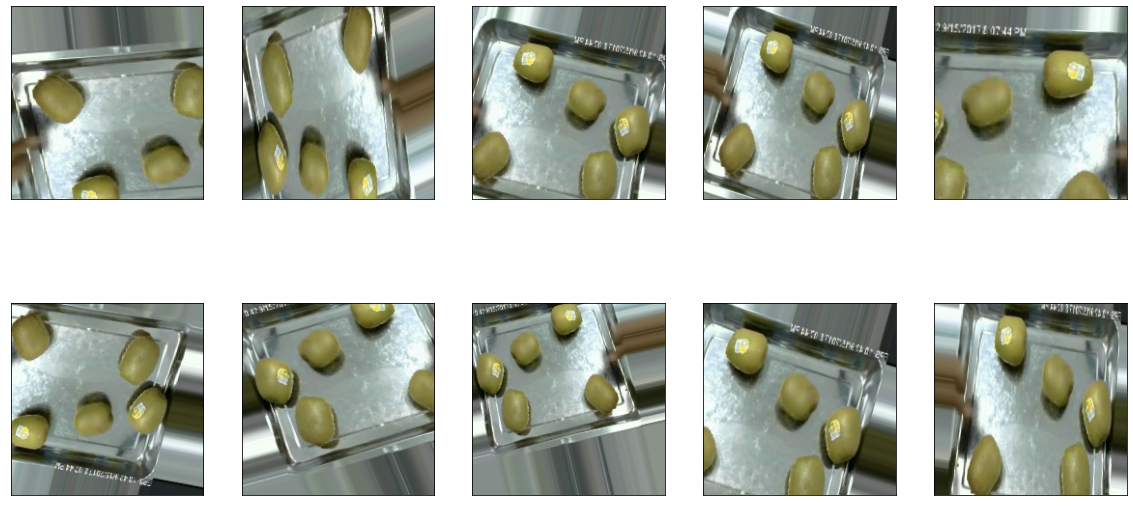

In [15]:
fig = plt.figure(figsize=(20, 5 * 2))
i = 0
for batch in augmentation.flow(x, batch_size=1):
    ax = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(array_to_img(batch[0]))
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i == 10:
        break
plt.show()
del img, x, imgplot

In [11]:
train_generator = augmentation.flow_from_directory(train_dir,
                                                   target_size=target_size,
                                                   class_mode='categorical',
                                                   shuffle=True,
                                                   seed=42,
                                                   save_prefix='train',
                                                   interpolation='nearest',
                                                   subset='training')

Found 26650 images belonging to 15 classes.


In [12]:
train_generator.class_indices

{'Apple': 0,
 'Banana': 1,
 'DragonFruit': 2,
 'Guava': 3,
 'Kiwi': 4,
 'Mango': 5,
 'Muskmelon': 6,
 'Orange': 7,
 'Peach': 8,
 'Pear': 9,
 'Persimmon': 10,
 'Plum': 11,
 'Pomegranate': 12,
 'StarFruit': 13,
 'Tomatoes': 14}

In [13]:
validation_generator = augmentation.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    save_prefix='val',
    interpolation='nearest',
    subset='validation')

Found 6655 images belonging to 15 classes.


In [14]:
test_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    save_prefix='test',
    interpolation='nearest')

Found 11101 images belonging to 15 classes.


In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras import metrics, losses, optimizers, callbacks
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, cohen_kappa_score, classification_report

In [16]:
input_shape = train_generator.image_shape
input_shape

(200, 200, 3)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [17]:
model = Sequential(name='model_1')

model.add(
    Conv2D(filters=32,
           kernel_size=(3, 3),
           input_shape=input_shape,
           activation='relu',
           padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(
    Conv2D(filters=32,
           kernel_size=(3, 3),
           input_shape=input_shape,
           activation='relu',
           padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(
    Conv2D(filters=64,
           kernel_size=(3, 3),
           input_shape=input_shape,
           activation='relu',
           padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(
    Conv2D(filters=64,
           kernel_size=(3, 3),
           input_shape=input_shape,
           activation='relu',
           padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(
  Conv2D(filters=128,
           kernel_size=(3, 3),
           input_shape=input_shape,
           activation='relu',
           padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(
    Conv2D(filters=128,
           kernel_size=(3, 3),
           input_shape=input_shape,
           activation='relu',
           padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='softmax'))

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        3692

In [26]:
clear_session()

In [27]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.CategoricalCrossentropy(),
              metrics=metrics.CategoricalAccuracy())

In [28]:
# model_path= '../Image-Classification/models/'
model_path = '/content/drive/MyDrive/colab/best_models/'
if not os.path.exists(model_path):
    os.mkdir(model_path)
os.listdir(model_path)

['model_20210729_0909.h5', 'model_20210729_1514.h5', 'csv_log.csv']

In [29]:
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(
    model_path,
    'model_{}.h5'.format(datetime.datetime.utcnow().strftime("%Y%m%d_%H%M"))),
                                             monitor='val_loss',
                                             verbose=1,
                                             save_best_only=True,
                                             save_freq='epoch')
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

csv_logger = callbacks.CSVLogger(os.path.join(model_path, 'metrics_log.csv'),
                                 separator=',',
                                 append=True)

In [30]:
history_list = list()

In [31]:
history_list.append(
    model.fit(
        train_generator,
        epochs=50,
        verbose=2,
        callbacks=[model_checkpoint, early_stopping, csv_logger],
        validation_data=validation_generator,
        shuffle=True,
        initial_epoch=0,
        validation_freq=1,
    ))

Epoch 1/50
167/167 - 2694s - loss: 2.6752 - categorical_accuracy: 0.1130 - val_loss: 2.6687 - val_categorical_accuracy: 0.0941

Epoch 00001: val_loss improved from inf to 2.66869, saving model to /content/drive/MyDrive/colab/best_models/model_20210730_1508.h5
Epoch 2/50
167/167 - 86s - loss: 2.6708 - categorical_accuracy: 0.1104 - val_loss: 2.6638 - val_categorical_accuracy: 0.1129

Epoch 00002: val_loss improved from 2.66869 to 2.66376, saving model to /content/drive/MyDrive/colab/best_models/model_20210730_1508.h5
Epoch 3/50
167/167 - 84s - loss: 2.6680 - categorical_accuracy: 0.1097 - val_loss: 2.6636 - val_categorical_accuracy: 0.1129

Epoch 00003: val_loss improved from 2.66376 to 2.66364, saving model to /content/drive/MyDrive/colab/best_models/model_20210730_1508.h5
Epoch 4/50
167/167 - 85s - loss: 2.6673 - categorical_accuracy: 0.1130 - val_loss: 2.6653 - val_categorical_accuracy: 0.1129

Epoch 00004: val_loss did not improve from 2.66364
Epoch 5/50
167/167 - 85s - loss: 2.6666

In [35]:
model.compile(optimizer=optimizers.Adam(learning_rate=1),
              loss=losses.CategoricalCrossentropy(),
              metrics=metrics.CategoricalAccuracy())

In [36]:
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, patience=3, 
    verbose=1, min_lr=0.0001
    )

In [37]:
history_list.append(
    model.fit(
        train_generator,
        epochs=50,
        verbose=2,
        callbacks=[reduce_lr, model_checkpoint, early_stopping, csv_logger],
        validation_data=validation_generator,
        shuffle=True,
        initial_epoch=19,
        validation_freq=1,
    ))

Epoch 20/50
167/167 - 89s - loss: 3.4053 - categorical_accuracy: 0.0797 - val_loss: 2.7426 - val_categorical_accuracy: 0.1129

Epoch 00020: val_loss did not improve from 2.66310
Epoch 21/50
167/167 - 86s - loss: 2.8081 - categorical_accuracy: 0.0840 - val_loss: 2.7434 - val_categorical_accuracy: 0.0933

Epoch 00021: val_loss did not improve from 2.66310
Epoch 22/50
167/167 - 87s - loss: 2.7815 - categorical_accuracy: 0.0879 - val_loss: 2.7268 - val_categorical_accuracy: 0.0933

Epoch 00022: val_loss did not improve from 2.66310
Epoch 23/50
167/167 - 85s - loss: 2.7881 - categorical_accuracy: 0.0947 - val_loss: 2.8151 - val_categorical_accuracy: 0.1129

Epoch 00023: val_loss did not improve from 2.66310
Epoch 24/50
167/167 - 85s - loss: 2.7896 - categorical_accuracy: 0.0941 - val_loss: 2.8727 - val_categorical_accuracy: 0.0903

Epoch 00024: val_loss did not improve from 2.66310
Epoch 25/50
167/167 - 86s - loss: 2.8084 - categorical_accuracy: 0.0894 - val_loss: 2.7791 - val_categorical_a

In [38]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.1),
              loss=losses.CategoricalCrossentropy(),
              metrics=metrics.CategoricalAccuracy())

In [39]:
history_list.append(
    model.fit(
        train_generator,
        epochs=50,
        verbose=2,
        callbacks=[reduce_lr, model_checkpoint, early_stopping, csv_logger],
        validation_data=validation_generator,
        shuffle=True,
        initial_epoch=27,
        validation_freq=1,
    ))

Epoch 28/50
167/167 - 87s - loss: 2.6820 - categorical_accuracy: 0.1078 - val_loss: 2.6804 - val_categorical_accuracy: 0.0933

Epoch 00028: val_loss did not improve from 2.66310
Epoch 29/50
167/167 - 84s - loss: 2.6797 - categorical_accuracy: 0.1022 - val_loss: 2.6807 - val_categorical_accuracy: 0.1129

Epoch 00029: val_loss did not improve from 2.66310
Epoch 30/50
167/167 - 85s - loss: 2.6802 - categorical_accuracy: 0.1024 - val_loss: 2.6748 - val_categorical_accuracy: 0.1129

Epoch 00030: val_loss did not improve from 2.66310
Epoch 31/50
167/167 - 85s - loss: 2.6781 - categorical_accuracy: 0.1027 - val_loss: 2.6919 - val_categorical_accuracy: 0.0903

Epoch 00031: val_loss did not improve from 2.66310
Epoch 32/50
167/167 - 86s - loss: 2.6835 - categorical_accuracy: 0.0990 - val_loss: 2.6753 - val_categorical_accuracy: 0.1129

Epoch 00032: val_loss did not improve from 2.66310
Epoch 33/50
167/167 - 86s - loss: 2.6767 - categorical_accuracy: 0.1085 - val_loss: 2.6732 - val_categorical_a

KeyboardInterrupt: ignored

In [32]:
def plot_history(history_list, to_plot=['loss', 'val_loss']):
    plt.figure(figsize=(7, 5))
    for i in to_plot:
        j = list()
        for history in history_list:
            for k in history.history[i]:
                j.append(k)
            epochs = range(1, len(j) + 1)
            color = 'red' if 'val' in i else 'blue'
            marker = '.' if 'val' in i else '_'
            plt.plot(epochs, j, color=color, marker=marker, label=i)

    plt.ylim(top=np.ceil(max(j)))
    plt.legend()
    plt.xlabel('epoch (total = {})'.format(len(epochs)))
    plt.show()

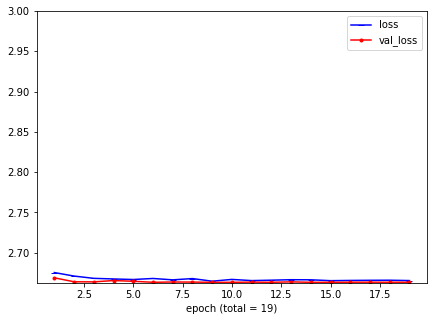

In [33]:
plot_history(history_list, to_plot=['loss', 'val_loss'])

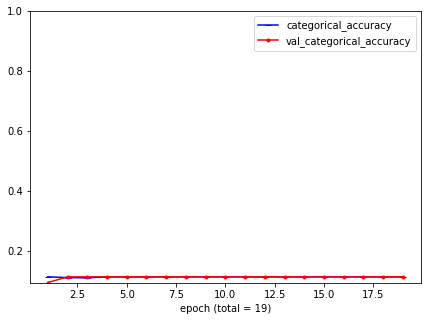

In [34]:
plot_history(history_list,
             to_plot=['categorical_accuracy', 'val_categorical_accuracy'])

In [ ]:
model.evaluate(test_generator, return_dict=True)

347/347 [==============================] - 83s 238ms/step - loss: 0.0509 - categorical_accuracy: 0.9861


{'categorical_accuracy': 0.9861273765563965, 'loss': 0.0508771650493145}

In [ ]:
model = load_model(os.path.join(model_path, '???'))

In [ ]:
test_preds = model.predict(test_generator)

In [ ]:
confusion_matrix(test_generator.classes, test_preds)

In [ ]:
classification_report(test_generator.classes, test_preds, labels=list(test_generator.class_indices.keys()))